<a href="https://colab.research.google.com/github/Victor-B-Canut/Vis-o-natural-e-artificial/blob/main/Perona_Malik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

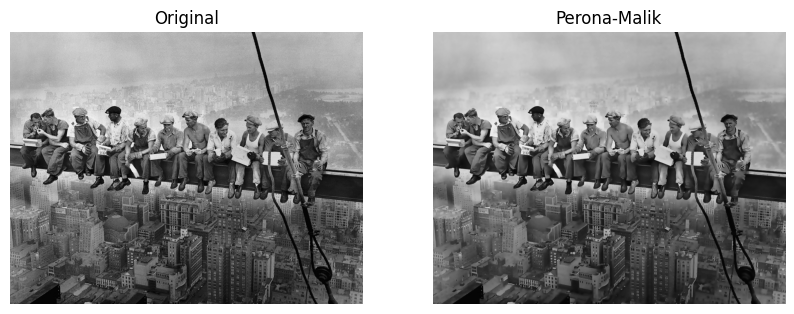

In [ ]:
import numpy as np
import cv2
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import io, transform

def perona_malik(img, num_iter, delta_t, kappa, option=1):
    """
    Processo de difusão anisotrópica de Perona-Malik.

    Parameters:
    img : imagem (array).
    num_iter : número de iterações (int).
    delta_t : passo/tempo de integração (float).
    kappa : Condutividade (float).
    option : opção de função de difusão (int).
         1: g = exp(-(grad/kappa)**2)
         2: g = 1 / (1 + (grad/kappa)**2)

    """

    diffused_img = img.astype(float)

    # Matrizes de convolução, necessárias para trabalhar com setores diferentes da imagem
    hN = np.array([[0, 1, 0],
                   [0, -1, 0],
                   [0, 0, 0]], dtype=float)

    hS = np.array([[0, 0, 0],
                   [0, -1, 0],
                   [0, 1, 0]], dtype=float)

    hE = np.array([[0, 0, 0],
                   [0, -1, 1],
                   [0, 0, 0]], dtype=float)

    hW = np.array([[0, 0, 0],
                   [1, -1, 0],
                   [0, 0, 0]], dtype=float)

    for i in range(num_iter):
        # cálculo dos gradientes
        nablaN = convolve(diffused_img, hN)
        nablaS = convolve(diffused_img, hS)
        nablaE = convolve(diffused_img, hE)
        nablaW = convolve(diffused_img, hW)

        # Cálculo da função de difusão
        if option == 1:
            cN = np.exp(-(nablaN / kappa) ** 2)
            cS = np.exp(-(nablaS / kappa) ** 2)
            cE = np.exp(-(nablaE / kappa) ** 2)
            cW = np.exp(-(nablaW / kappa) ** 2)
        elif option == 2:
            cN = 1.0 / (1.0 + (nablaN / kappa) ** 2)
            cS = 1.0 / (1.0 + (nablaS / kappa) ** 2)
            cE = 1.0 / (1.0 + (nablaE / kappa) ** 2)
            cW = 1.0 / (1.0 + (nablaW / kappa) ** 2)

        diffused_img += delta_t * (cN * nablaN + cS * nablaS + cE * nablaE + cW * nablaW)

    return diffused_img

img1 = cv2.imread('/content/drive/MyDrive/Images/Lunch_atop_a_Skyscraper.png', cv2.IMREAD_GRAYSCALE)

num_iter = 25
delta_t = 1/7
kappa = 15
option = 1

img1final = perona_malik(img1, num_iter, delta_t, kappa, option)



plt.figure(figsize=(10,10))
plt.subplot(1,2 , 1)
plt.imshow(img1, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img1final, cmap='gray')
plt.title('Perona-Malik')
plt.axis('off')
plt.show()


(-0.5, 730.5, 680.5, -0.5)

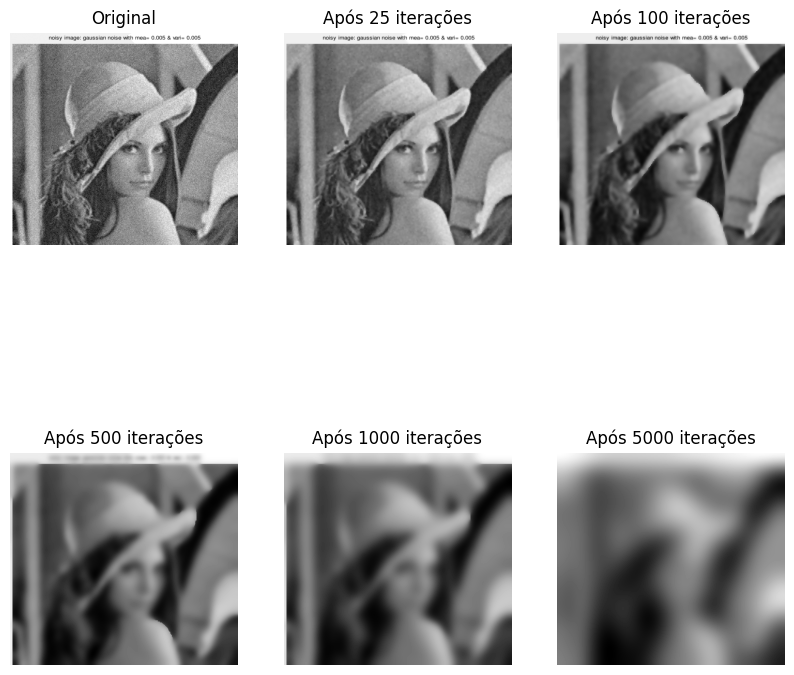

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/Images/Noisy-image.png', cv2.IMREAD_GRAYSCALE)


delta_t = 1/7
kappa = 15
option = 1


img3int25 = perona_malik(img3, 25, delta_t, kappa, 2)
img3int100 = perona_malik(img3, 100, delta_t, kappa, 2)
img3int500 = perona_malik(img3, 500, delta_t, kappa, 2)
img3int1000 = perona_malik(img3, 1000, delta_t, kappa, 2)
img3int5000 = perona_malik(img3, 5000, delta_t, kappa, 2)

plt.figure(figsize=(10,10))
plt.subplot(2, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(img3int25,cmap='gray')
plt.title('Após 25 iterações')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(img3int100, cmap='gray')
plt.title('Após 100 iterações')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(img3int500,cmap='gray')
plt.title('Após 500 iterações')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(img3int1000, cmap='gray')
plt.title('Após 1000 iterações')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(img3int5000,cmap='gray')
plt.title('Após 5000 iterações')
plt.axis('off')

(-0.5, 730.5, 680.5, -0.5)

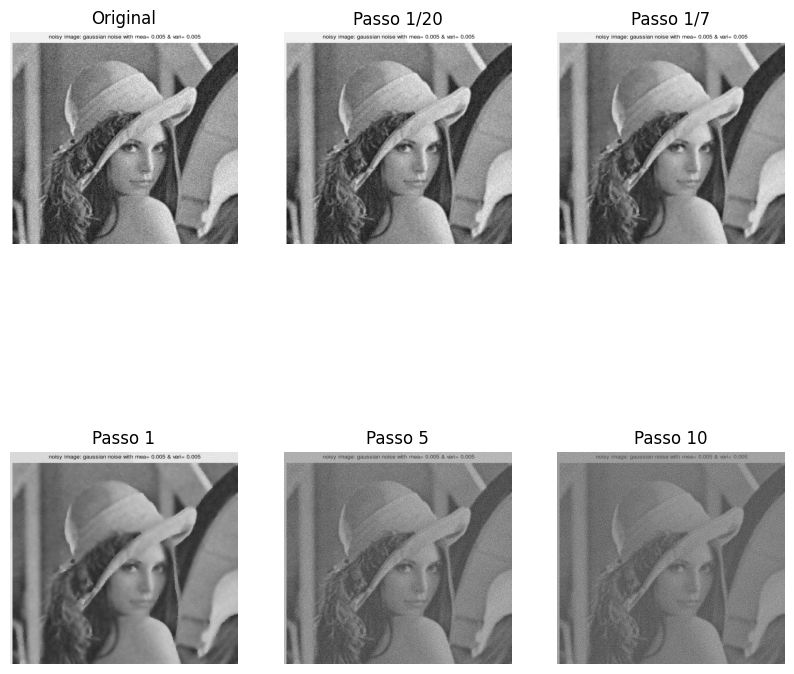

In [ ]:

num_iter = 50
kappa = 15
option = 1


img3t1 = perona_malik(img3, num_iter, 1/20, kappa, option)
img3t2 = perona_malik(img3, num_iter, 1/7, kappa, option)
img3t3 = perona_malik(img3, num_iter, 1, kappa, option)
img3t4 = perona_malik(img3, num_iter, 5, kappa, option)
img3t5 = perona_malik(img3, num_iter, 10, kappa, option)



plt.figure(figsize=(10,10))
plt.subplot(2, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(img3t1,cmap='gray')
plt.title('Passo 1/20')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(img3t2, cmap='gray')
plt.title('Passo 1/7')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(img3t3,cmap='gray')
plt.title('Passo 1')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(img3t4, cmap='gray')
plt.title('Passo 5')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(img3t5,cmap='gray')
plt.title('Passo 10')
plt.axis('off')

(-0.5, 730.5, 680.5, -0.5)

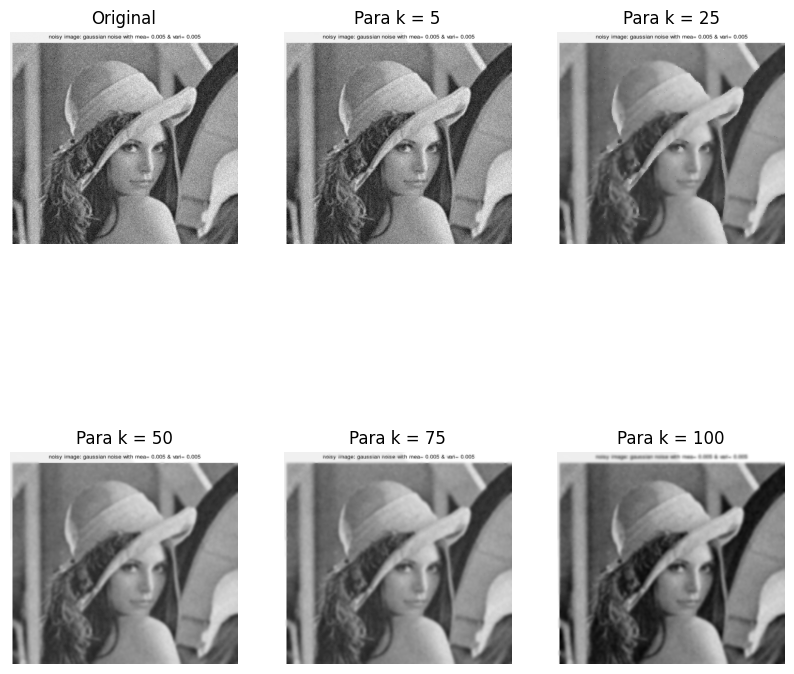

In [ ]:
num_iter = 50
delta_t = 1/7
kappa = 15
option = 1


img3k1 = perona_malik(img3, 50, delta_t, 5, 1)
img3k2 = perona_malik(img3, 50, delta_t, 25, 1)
img3k3 = perona_malik(img3, 50, delta_t, 50, 1)
img3k4 = perona_malik(img3, 50, delta_t, 75, 1)
img3k5 = perona_malik(img3, 50, delta_t, 100, 1)

plt.figure(figsize=(10,10))
plt.subplot(2, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(img3k1,cmap='gray')
plt.title('Para k = 5')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(img3k2, cmap='gray')
plt.title('Para k = 25')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(img3k3,cmap='gray')
plt.title('Para k = 50')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(img3k4, cmap='gray')
plt.title('Para k = 75')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(img3k5,cmap='gray')
plt.title('Para k = 100')
plt.axis('off')

(-0.5, 730.5, 680.5, -0.5)

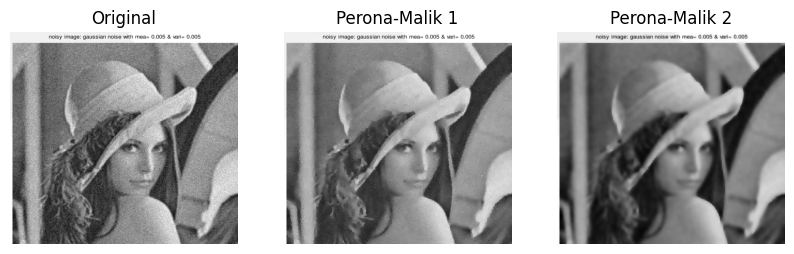

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/Images/Noisy-image.png', cv2.IMREAD_GRAYSCALE)

num_it2 = 100
delta_t = 1/7
kappa = 15

img3final1 = perona_malik(img3, num_it2, delta_t, kappa, 1)
img3final2 = perona_malik(img3, num_it2, delta_t, kappa, 2)

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img3final1,cmap='gray')
plt.title('Perona-Malik 1')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img3final2,cmap='gray')
plt.title('Perona-Malik 2')
plt.axis('off')